# Exercise 04

## PCA on deformations
Consider the square [−1, 1] ∈ R2 , discretized by a uniform grid with nPts = 15 points along each
axis. The file UVData.npz contains an array UVData with dimensions nMaps × 2 × nPts × nPts.
For each i in range(nMaps), the pair U,V = UVData[i] encodes a deformation of this grid, where
U contains the horizontal and V the vertical coordinates. As reference, UVData.npz also contains
the arrays X and Y that contain the original horizontal and vertical positions of the undeformed
grid points.

1. Display the first five deformations, e.g. as in the figure below, left. Briefly comment on
what types of deformations you can see.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def getLines_new(uv_data, transformation_idx):
    x = uv_data[transformation_idx][0]
    y = uv_data[transformation_idx][1]

    X = x.transpose()
    Y = y.transpose()

    return np.concatenate((X, x)), np.concatenate((Y, y))


rng = [-1, 1]
nLines = 15
nPtsPerLine = 20

uv_data = np.load('../material/UVData.npz')['UVData']

fig = plt.figure(figsize=(8, 4))
fig.add_subplot(1, 2, 1, aspect=1.)

for i in range(5):
    X, Y = getLines_new(uv_data, i)

    for x, y in zip(X, Y):
        plt.plot(x, y, c="k")

plt.show()


2. Now apply PCA to the collection of deformations. Interpret each pair (U, V) as a one-
dimensional vector of length 2 · nPoints2 , i.e. interpret UVData as two-dimensional array
of dimension nMaps × (2 · nPoints2 ) and perform PCA on it, as in shown in the lecture.
Visualize the eigenvalues and their cumulative sum. How many modes / eigenvalues are
needed to capture at least 99% of the variance?
Hint: Do not forget to center the data before applying PCA.

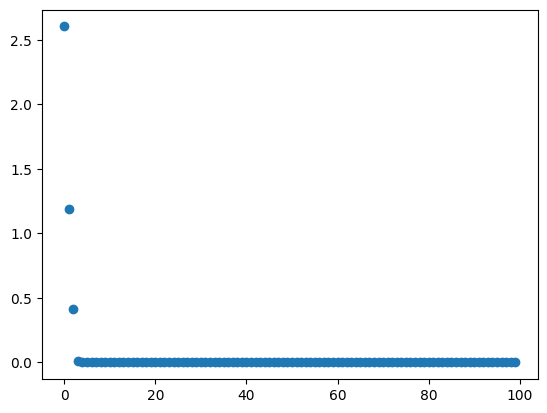

99 percent: i ==  3


In [4]:
def PCA(dataMat, keep=None):
    nSamples, dim = dataMat.shape
    if dim < nSamples:
        if keep is None:
            keep = dim
        A = dataMat.transpose().dot(dataMat) / nSamples
        eigData = np.linalg.eigh(A)
        eigval = (eigData[0][-keep::])[::-1]
        eigvec = ((eigData[1][:, -keep::]).transpose())[::-1]
    else:
        if keep is None:
            keep = nSamples
        A = dataMat.dot(dataMat.transpose()) / nSamples
        eigData = np.linalg.eigh(A)
        eigval = (eigData[0][-keep::])[::-1]
        eigvec = ((eigData[1][:, -keep::]).transpose())[::-1]
        eigvec = np.einsum(eigvec, [0, 1], dataMat, [1, 2], [0, 2])
        normList = np.linalg.norm(eigvec, axis=1)
        eigvec = np.einsum(eigvec, [0, 1], 1 / normList, [0], [0, 1])
    return eigval, eigvec


uv_data_flat = []
for curr_uv_data in uv_data:
    tmp = np.array(curr_uv_data).flatten()
    uv_data_flat.append(tmp)

uv_data_flat = np.array(uv_data_flat)
uv_mean = np.mean(uv_data_flat, axis=0)
uv_data_flat -= uv_mean

eigval, eigvec = PCA(uv_data_flat)
plt.scatter(np.arange(0, 100), eigval)
plt.show()

sum = np.sum(eigval)
target = sum * 0.99

i = 0
while target >= 0 and i < eigval.shape[0]:
    target -= eigval[i]
    i += 1

print('99 percent: i == ', i)
